In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
flights = pd.read_csv('data/flights_dirty.csv')

In [6]:
# Check the top of DataFrame
flights.head()

,year,month,passengers
0,1949,jan,114.388770
1,1949,Feb,116.704857
2,1949,Mar,129.126454
3,1949,Apr,126.892509
4,1949,May,122.699105


In [7]:
# Check the bottom of DataFrame
flights.tail()

,year,month,passengers
149,1955,Feb,224.654338
150,1950,Jul,166.140905
151,1958,Oct,367.306509
152,1955,Jul,362.328765
153,1955,May,268.410765


> The `passengers` column is `float` instead of an `int` data type
>
> Inconsistency in the string format in the `month` column

In [6]:
# Check the summary information
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        154 non-null    object 
 1   month       154 non-null    object 
 2   passengers  136 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


In [7]:
# Check the descriptive statistics
flights.describe()

,passengers
count,136.000000
mean,299.633655
std,171.510392
min,-15.748963
25%,189.203060
50%,275.432094
75%,366.067432
max,1503.245434


In [8]:
flights.describe(include='O')

,year,month
count,154,154
unique,13,32
top,1955,Feb
freq,16,14


In [8]:
# investigate the year column
flights['year'].unique()

array(['1949', 'unknown', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960'], dtype=object)

> There is the possibilities of an outliter with a maximum of 1503

> There is a negative value (-15) in passengers which is bad data

> from the dataset information available there should be 12 uniques years (1949- 1960). This shows 13

> There is a 'unknown' value for year

In [14]:
 # confirm missing values
flights.isna().sum(0)

year           0
month          0
passengers    18
dtype: int64

In [15]:
# check the percentage of missing values
flights.isna().sum() / len(flights) * 100

year           0.000000
month          0.000000
passengers    11.688312
dtype: float64

<Axes: >

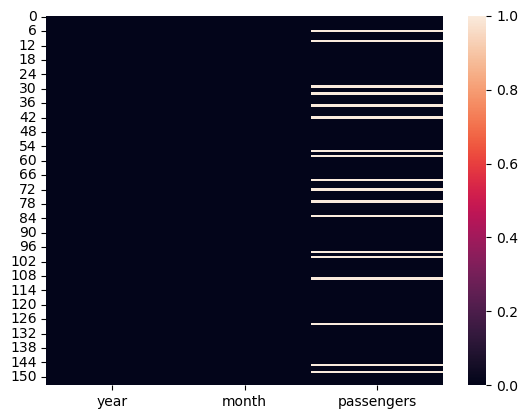

In [16]:
# Visualize the missing value
sns.heatmap(flights.isna())

In [17]:
# check for duplicates values
flights.duplicated(['year', 'month'])

0      False
1      False
2      False
3      False
4      False
       ...  
149     True
150     True
151     True
152     True
153     True
Length: 154, dtype: bool

In [18]:
# How many duplictates?
flights.duplicated(['year', 'month']).sum() # rmember True = 1

6

In [19]:
flights.duplicated(['year', 'month']).value_counts()

False    148
True       6
Name: count, dtype: int64

> Outcome: Duplicates detected, requires us to remove.

In [20]:
# check the values of month column
flights['month'].value_counts()

month
Feb     14
Aug     12
Jul     12
Dec     11
May     11
Sep     11
Jan     10
Nov     10
Jun      9
Apr      9
Oct      9
Mar      9
OCT      3
mar      3
oct      2
apr      2
NOV      2
jun      1
Sep      1
Jul      1
dec      1
sep      1
Jan      1
jan      1
jul      1
JUN      1
MAY      1
MAY      1
aug      1
nov      1
Apr      1
Jun      1
Name: count, dtype: int64

In [23]:
# Use groupby to see the mean, count median
flights.groupby('month').agg(['mean', 'median', 'count'])

TypeError: agg function failed [how->mean,dtype->object]

In [24]:
flights.groupby('month')['passengers'].agg(['mean', 'count', 'median'])

,mean,count,median
month,,,
Apr,255.058381,9,239.237007
Apr,126.892509,1,126.892509
Aug,368.199646,11,339.967974
Dec,261.386275,11,233.393368
Feb,237.072422,12,228.228183
JUN,268.702678,1,268.702678
Jan,391.008909,10,301.180138
Jan,NaN,0,NaN
Jul,367.283194,10,363.398796


> Inconsistent month labels needs to be corrected using - string manipulation 

In [25]:
# find month with value - 1503.245434
flights[flights['passengers'] == 1503.245434]

,year,month,passengers


In [26]:
flights['passengers'].max()

1503.2454336631456

In [28]:
flights[flights['passengers'] == 1503.2454336631456]

,year,month,passengers
24,1951,Jan,1503.245434


> seems like there is an outlier. we can confirm this with graphical EDA

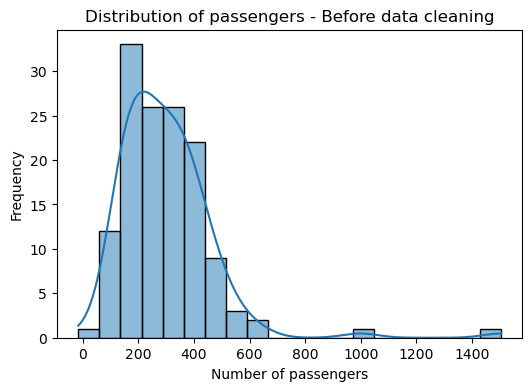

In [29]:
# Histogram to check the distribution 
plt.figure(figsize=(6, 4))
sns.histplot(data=flights, x='passengers', bins=20, kde=True)
plt.title('Distribution of passengers - Before data cleaning')
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')
plt.show();

> Outcome: Histogram confirms negative values and extreme positive outlier (> 1000)

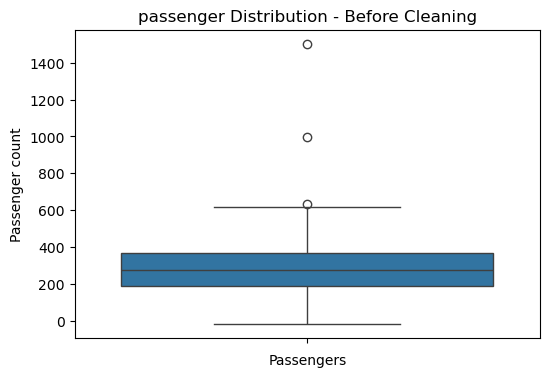

In [30]:
# Box plot to verify distribution 
plt.figure(figsize=(6, 4))
sns.boxplot(data=flights, y='passengers')
plt.title('passenger Distribution - Before Cleaning')
plt.xlabel('Passengers')
plt.ylabel('Passenger count')
plt.show();

> Outcome: Box plot shows extreme outliers in 'passengers' column. thus there is a confirmed need to handle outliers in the data cleaning step

In [29]:
flights.head(2)

,year,month,passengers
0,1949,jan,114.388770
1,1949,Feb,116.704857


In [41]:
# let see a trend of the passengers
# Create a new column that has the 'mon - year'
flights['Month_Year'] = flights['month'].astype(str) + '-' + flights['year'].astype(str)

In [42]:
flights['Month_Year']

0      jan -1949
1       Feb-1949
2       Mar-1949
3      Apr -1949
4       May-1949
         ...    
149     Feb-1955
150     Jul-1950
151     Oct-1958
152     Jul-1955
153     May-1955
Name: Month_Year, Length: 154, dtype: object

In [43]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        154 non-null    object 
 1   month       154 non-null    object 
 2   passengers  136 non-null    float64
 3   Month_Year  154 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


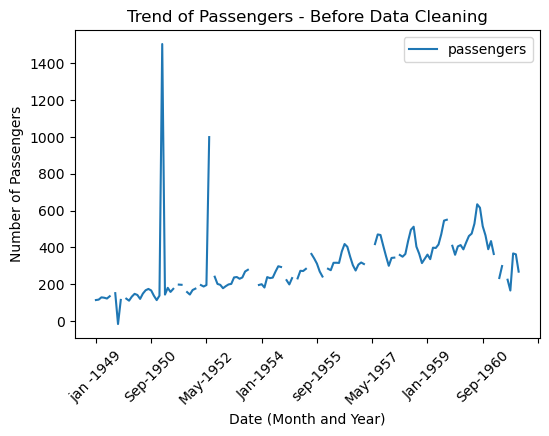

In [46]:
flights.plot('Month_Year', figsize=(6, 4))
plt.title('Trend of Passengers - Before Data Cleaning')
plt.xlabel('Date (Month and Year)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show();

> Outcome: Line plot shows erratic spikes due to the outliers and gaps due to bad and/or missing data. Cleaning required!

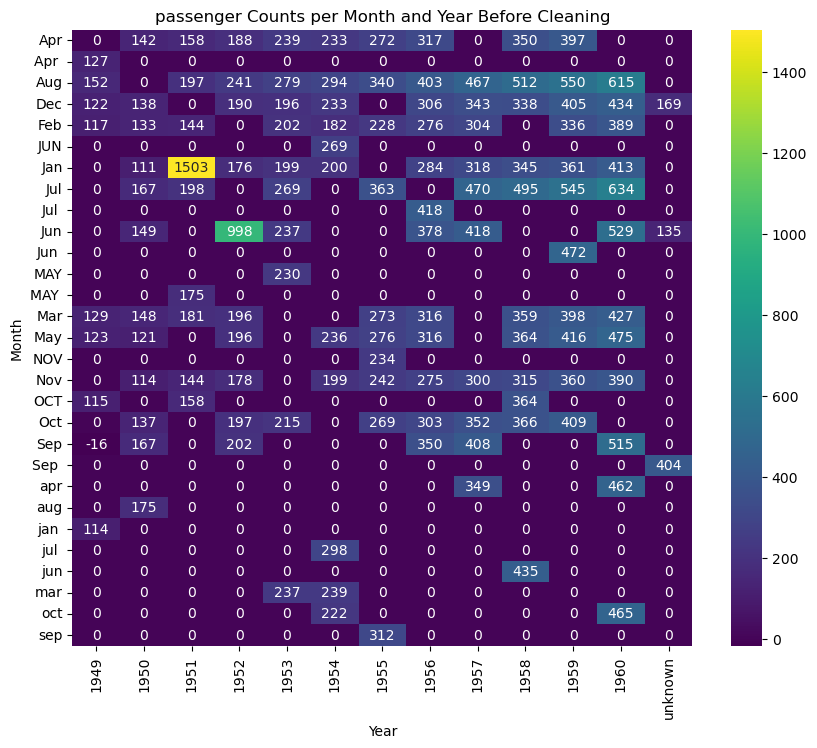

In [47]:
# heatmap
plt.figure(figsize=(10, 8))
pivot = flights.pivot_table(index='month', columns='year', values='passengers', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('passenger Counts per Month and Year Before Cleaning')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show();

> Outcome: Heatmap shows fragmented months due to bad formatting and missing data gaps.

**Data Cleaning**

   > Proposed steps

   - Standardaize the month column string format
   - Rename Columns to Sentence Case
   - Correct the data type - Year - Integer and `Passengers` - Integer
   - Fill Missing data - median 
   - Remove the negative value row
   - Remove duplicates
   - Clean the `year` column of the 'unknown' value
   - Clip the outlier to max and min using IQR 

In [48]:
# Clean the month column
flights['month'] = flights['month'].str.title().str.strip()

In [49]:
# Check is cleaning was good
flights['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [50]:
# Rename all columns to Sentence case
flights.rename(columns={'year': 'Year', 'month': 'Month', 'passengers': 'Passengers'}, inplace=True)

flights.head(2)

,Year,Month,Passengers,Month_Year
0,1949,Jan,114.388770,jan -1949
1,1949,Feb,116.704857,Feb-1949


In [53]:
# Clean the Month_Year Column
flights.Month_Year = flights['Month'] + '-' + flights.Year
flights.head()

,Year,Month,Passengers,Month_Year
0,1949,Jan,114.388770,Jan-1949
1,1949,Feb,116.704857,Feb-1949
2,1949,Mar,129.126454,Mar-1949
3,1949,Apr,126.892509,Apr-1949
4,1949,May,122.699105,May-1949


In [52]:
# Data type conversion
flights['Year'] = flights['Year'].astype(int)
flights['Passengers'] = flights['Passengers'].astype(int)

ValueError: invalid literal for int() with base 10: 'unknown'

In [55]:
# Find the `year` rows with unknown as value
flights['Year'] == 'unknown'

0      False
1      False
2      False
3      False
4      False
       ...  
149    False
150    False
151    False
152    False
153    False
Name: Year, Length: 154, dtype: bool

In [45]:
# Find the `year` rows with unknown as value
flights[flights['Year'] == 'unknown']

,Year,Month,Passengers,Month_Year
5,unknown,Jun,134.963099,Jun-unknown
35,unknown,Dec,168.780609,Dec-unknown
109,unknown,Feb,NaN,Feb-unknown
116,unknown,Sep,404.036532,Sep-unknown
148,unknown,Sep,NaN,Sep-unknown


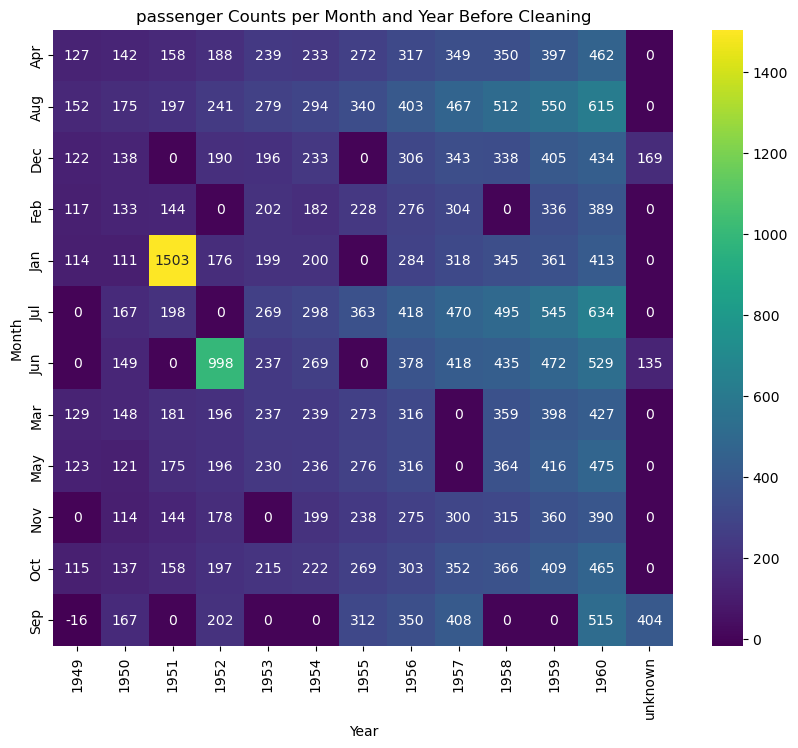

In [46]:
plt.figure(figsize=(10, 8))
pivot = flights.pivot_table(index='Month', columns='Year', values='Passengers', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('passenger Counts per Month and Year Before Cleaning')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show();

> after a review of the heatmap of missing months that correspond to availabe in `unknown` 

> we can select 1951 as the year of these data

In [56]:
flights.loc[flights['Year'] == 'unknown', 'Year'] = 1951

In [49]:
# Confirm that we have valid years 
flights['Year'].unique()

array(['1949', 1951, '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960'], dtype=object)

In [57]:
flights.loc[flights['Year'] == 1951, 'Year'] = '1951'

In [58]:
# Confirm that we have valid years 
flights['Year'].unique()

array(['1949', '1951', '1950', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960'], dtype=object)

In [59]:
# Data type conversion
flights['Year'] = flights['Year'].astype(int)
flights['Passengers'] = flights['Passengers'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer